In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
print('\n### train data info\n')
print(titanic_df.info())


### train data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin']=titanic_df['Cabin'].fillna('N')
titanic_df['Embarked']=titanic_df['Embarked'].fillna('N')
print('Number of NaN', titanic_df.isnull().sum().sum())

Number of NaN 0


In [7]:
print('Sex distribution:\n', titanic_df['Sex'].value_counts())
print('\nCabin distribution:\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked distribution:\n', titanic_df['Embarked'].value_counts())

Sex distribution:
 male      577
female    314
Name: Sex, dtype: int64

Cabin distribution:
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
E12              1
B37              1
F38              1
A36              1
C90              1
Name: Cabin, Length: 148, dtype: int64

Embarked distribution:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [21]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [27]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

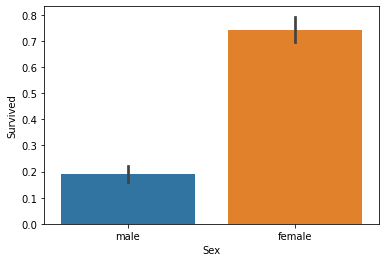

In [28]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

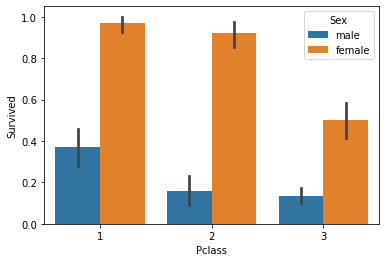

In [31]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

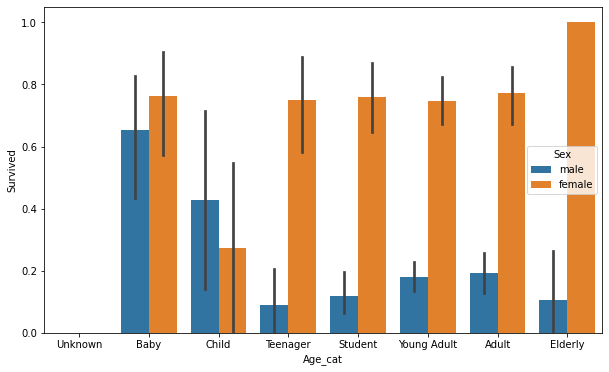

In [33]:
# categorizing age
def get_category(age):
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

# X axis order
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order = group_names)

In [36]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [41]:
test = ['a','b','c','d','e']
le = LabelEncoder()
le.fit(test)
en = le.transform(test)
print(le.classes_)
le.inverse_transform([1,2,3])

['a' 'b' 'c' 'd' 'e']


array(['b', 'c', 'd'], dtype='<U1')

In [42]:
from sklearn.preprocessing import LabelEncoder

# Null treatment function
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df
    
# Drop unnecessary features
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# Label encoding
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

# Data precprocessing function call
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [43]:
# original data reloading
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=10000)

# DecisionTreeClassifier learning/prediction/evaluation
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier accuracy: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier learing/prediction/evaluation
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier accuracy: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression learing/prediction/evaluation
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression accuracy: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier accuracy: 0.7877
RandomForestClassifier accuracy: 0.8547
LogisticRegression accuracy: 0.8492


- cross validation and hyperparameter tuning using GridSearchCV

In [54]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 5 fold sets KFold object creation, List for result storing
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold cross-validation
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        #Classifier learning/prediction/evaluation
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('CV {0} accuracy: {1:.4f}'.format(iter_count, accuracy))
    
    mean_score = np.mean(scores)
    print('average accuracy: {0:.4f}'.format(mean_score))
    
# exec_kfold call
exec_kfold(dt_clf, folds=5)

CV 0 accuracy: 0.7542
CV 1 accuracy: 0.7809
CV 2 accuracy: 0.7865
CV 3 accuracy: 0.7697
CV 4 accuracy: 0.8202
average accuracy: 0.7823


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('cv {0} accuracy: {1:.4f}'.format(iter_count, accuracy))
print('average accuracy: {0:.4f}'.format(np.mean(scores)))

cv 0 accuracy: 0.7430
cv 1 accuracy: 0.7753
cv 2 accuracy: 0.7921
cv 3 accuracy: 0.7865
cv 4 accuracy: 0.8427
average accuracy: 0.7879


In [60]:
#GridSearchCV searching for optimized hyperparameter
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, parameters, scoring='accuracy', cv=5, verbose=1)
grid_dclf.fit(X_train, y_train)
print('GridSearchCV best parameter:', grid_dclf.best_params_)
print('GridSearchCV best accuracy:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# Using best estimator for prediction and evaluation
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('Accuracy of the best estimator for test set: {0:.4f}'.format(accuracy))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV best parameter: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV best accuracy:0.7992
Accuracy of the best estimator for test set: 0.8715


In [62]:
pd.DataFrame(grid_dclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003410,4.921603e-04,0.002006,6.361803e-04,2,1,2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
1,0.003610,4.906808e-04,0.001402,4.903692e-04,2,1,3,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
2,0.004109,1.113615e-03,0.002735,6.180624e-04,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
3,0.006218,2.795569e-03,0.003406,4.925317e-04,2,5,2,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
4,0.005221,8.051382e-04,0.002908,9.195152e-04,2,5,3,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
5,0.004412,1.022424e-03,0.002606,1.021666e-03,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
6,0.004512,1.269381e-03,0.003009,7.066196e-04,2,8,2,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
7,0.003205,9.823881e-04,0.001404,4.912254e-04,2,8,3,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
8,0.004813,9.824707e-04,0.002409,4.891773e-04,2,8,5,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
9,0.003907,1.019116e-03,0.002411,4.952672e-04,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.790210,0.797203,0.830986,0.802817,0.774648,0.799173,0.018499,4
